In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./simulation_results_completed.csv')
df.head()

,Date,Dry-bulb temperature (°C),Total system energy (kBtu/h),System natural gas (kBtu/h),System electricity (kBtu/h),Total lights energy (kBtu/h),Lights electricity (kBtu/h),Total equip energy (kBtu/h),Equip electricity (kBtu/h),Total CE ex equip (kgCO2/h),...,Electricity (mu),Gas (mu),Renewables (mu),Total nat. gas (kBtu/h),Total electricity (kBtu/h),Total grid displaced elec. PV (kBtu/h),Total energy (kBtu/h),Transformer Losses (kBtu/h),Agile Import price (p/kWh),Agile Export price (p/kWh)
0,2023-01-01 00:00:00,5.5,7.460,7.325,0.135,0.0,0.0,2.912,2.912,0.5,...,0.06,0.03,0.0,7.325,3.048,0.0,10.372,0.0,4.41,2.77
1,2023-01-01 00:30:00,5.5,7.465,7.330,0.135,0.0,0.0,2.912,2.912,0.5,...,0.06,0.03,0.0,7.330,3.048,0.0,10.378,0.0,13.91,6.86
2,2023-01-01 01:00:00,5.5,7.468,7.333,0.135,0.0,0.0,2.912,2.912,0.5,...,0.06,0.03,0.0,7.333,3.048,0.0,10.380,0.0,15.44,7.52
3,2023-01-01 01:30:00,5.5,7.467,7.331,0.135,0.0,0.0,2.912,2.912,0.5,...,0.06,0.03,0.0,7.331,3.048,0.0,10.379,0.0,1.10,1.34
4,2023-01-01 02:00:00,5.5,7.465,7.330,0.135,0.0,0.0,2.912,2.912,0.5,...,0.06,0.03,0.0,7.330,3.048,0.0,10.378,0.0,6.70,3.76


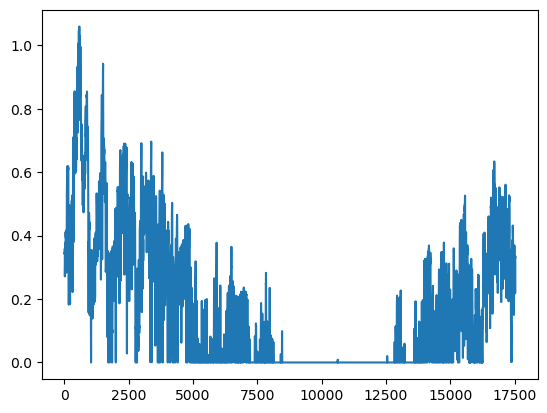

In [3]:
plt.plot(df["Ap Sys boilers space cond'g load (kW)"]*0.5)

In [4]:
sum(df["Ap Sys boilers space cond'g load (kW)"]*0.5)

2950.9060999999942

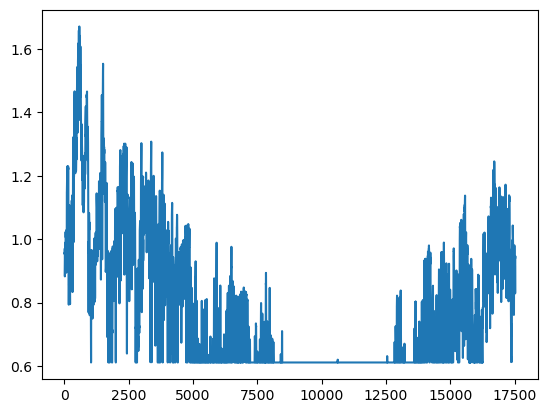

In [5]:
plt.plot(df["Ap Sys boilers load (kW)"]*0.5)

In [6]:
sum(df["Ap Sys boilers load (kW)"]*0.5)

13663.394000002661

In [7]:
# effi = np.mean(df["Ap Sys boilers load (kW)"]/(df["Total nat. gas (kBtu/h)"] * 0.29307107))

In [8]:
effi = 0.95
scaling = (11500*effi)/sum(df["Ap Sys boilers load (kW)"]*0.5)
scaling

0.7995817144699093

In [9]:
df["DHW demand (kW)"] = df["Ap Sys boilers load (kW)"] * scaling * 0.18

In [10]:
sum(df["DHW demand (kW)"]*0.5)

1966.499999999405

In [11]:
# for idx, value in df["Ap Sys boilers space cond\'g load (kW)"].items():

#     df.at[idx, "DHW demand (kW)"] = df.at[idx, 'Ap Sys boilers load (kW)']*scaling*0.18
#     df.at[idx, "SH demand (kW)"] = df.at[idx, 'Ap Sys boilers load (kW)']*scaling*0.82

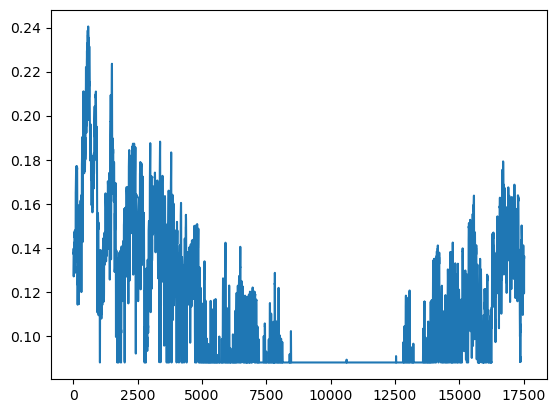

In [12]:
plt.plot(df["DHW demand (kW)"]*0.5)

In [13]:
df2 = pd.read_csv('./ninja_demand_newcastle.csv')

In [14]:
scaling2 = (11500*effi)/sum(df2["heating_demand"])
scaling2

1.0317319185557872

In [15]:
for idx, value in df2['heating_demand'].items():
    df.at[idx*2, 'SH demand (kW)'] = value * scaling2 * 0.82
    df.at[idx*2+1, 'SH demand (kW)'] = value * scaling2 * 0.82
    

In [16]:
sum(df["SH demand (kW)"]*0.5)

8958.499999999933

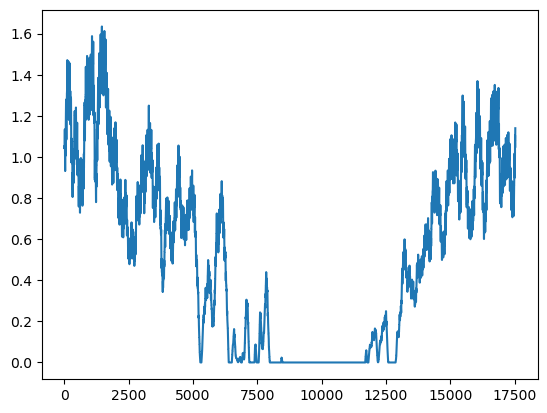

In [17]:
plt.plot(df["SH demand (kW)"]*0.5)

In [18]:
sum(df["SH demand (kW)"]*0.5) + sum(df["DHW demand (kW)"]*0.5)

10924.999999999338

In [19]:
df["Total heat demand (kW)"] = df["SH demand (kW)"] + df["DHW demand (kW)"]

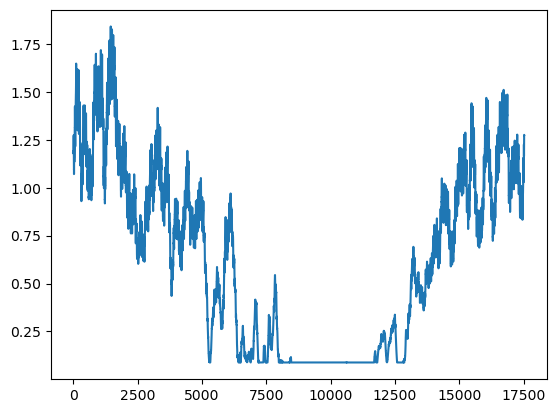

In [27]:
plt.plot(df["Total heat demand (kW)"]*0.5)

In [20]:
sum(df["Total heat demand (kW)"]*0.5)

10925.000000000437

In [21]:
np.mean(df["SH demand (kW)"]/df["Total heat demand (kW)"])

np.float64(0.5823086252216664)

In [22]:
sum(df["SH demand (kW)"])/sum(df["Total heat demand (kW)"])

0.8199999999999611

In [23]:
scaling_ele = 2700/sum(df["Total electricity (kBtu/h)"] * 0.29307107 * 0.5)

In [24]:
df["Ele demand (kW)"] = df["Total electricity (kBtu/h)"] * 0.29307107 * scaling_ele

In [25]:
sum(df["Ele demand (kW)"]*0.5)

2700.0000000001087

In [26]:
df.to_csv('./simulation_results_finished.csv', index=False)